In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from pyswarm import pso  # Install using: pip install pyswarm

In [52]:
# Load dataset (Replace 'dataset.csv' with the actual dataset file)
df = pd.read_csv("synthetic_fraud_dataset.csv")

# Split features and target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable


print("Initial Dataset Info:")
df.info()
print("\nFirst 5 Rows of the Dataset:")
print(df.head())
num_features = df.shape[1]

print("Number of features:", num_features)

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 no

In [54]:
print(X.dtypes)  # Check column data types
print(X.select_dtypes(include=['object']).head())  # View sample non-numeric values

Transaction_ID                   object
User_ID                          object
Transaction_Amount              float64
Transaction_Type                 object
Timestamp                        object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                   int64
Previous_Fraudulent_Activity      int64
Daily_Transaction_Count           int64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                        int64
dtype: object
  Transaction_ID    User_ID Transaction_Type            Timestamp Device_Type  \
0      TXN_33553  USER_1834              POS  2023-08-14 19:30:00      Laptop   
1       TXN_9427  USER_7

In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Store encoders for future inverse transformations

for col in ["Authentication_Method"]:  # Add other ordinal columns if needed
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Ensure X is the correct DataFrame
print("\n🔹 Columns in X BEFORE processing:\n", X.columns)

# Drop unnecessary columns (if they exist)
columns_to_drop = ["Transaction_ID", "User_ID", "Timestamp"]
X = X.drop(columns=[col for col in columns_to_drop if col in X.columns], errors="ignore")

# Print columns after dropping
print("\n🔹 Columns in X AFTER dropping unnecessary ones:\n", X.columns)

# Define categorical columns dynamically (only those present)
categorical_columns = ["Transaction_Type", "Device_Type", "Location", 
                       "Merchant_Category", "Card_Type"]
available_categorical = [col for col in categorical_columns if col in X.columns]

print("\n🔹 Categorical Columns Found:\n", available_categorical)

# Encode categorical columns if available
if available_categorical:
    X = pd.get_dummies(X, columns=available_categorical, drop_first=True)
else:
    print("\n⚠️ No categorical columns found for encoding!")

# Print transformed dataset
print("\n🔹 Columns in X AFTER encoding:\n", X.columns)

# Define scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

# Normalize and print data
for name, scaler in scalers.items():
    print(f"\n🔹 Applying {name}...\n")

    # Apply transformation
    X_scaled = scaler.fit_transform(X)

    # Convert back to DataFrame for readability
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # Print first 5 rows
    print(X_scaled_df.head())



🔹 Columns in X BEFORE processing:
 Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend'],
      dtype='object')

🔹 Columns in X AFTER dropping unnecessary ones:
 Index(['Transaction_Amount', 'Transaction_Type', 'Account_Balance',
       'Device_Type', 'Location', 'Merchant_Category', 'IP_Address_Flag',
       'Previous_Fraudulent_Activity', 'Daily_Transaction_Count',
       'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Type',
       'Card_Age', 'Transaction_Distance', 'Authentication_Method',
       'Risk_Score', 'Is_Weekend'],
      dtype='object')

🔹 Categorical Columns Found:
 ['Tran

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Ensure X is a DataFrame with numerical values only
X_copy = X.select_dtypes(include=[np.number]).copy()

# Apply Standardization (Z-score)
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X_copy)

# Apply Min-Max Normalization
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X_copy)

# Convert back to DataFrame
X_standardized_df = pd.DataFrame(X_standardized, columns=X_copy.columns)
X_normalized_df = pd.DataFrame(X_normalized, columns=X_copy.columns)

# Compute Mean Absolute Difference (MAD)
mad_standard = np.mean(np.abs(X_copy - X_standardized_df)).mean()
mad_minmax = np.mean(np.abs(X_copy - X_normalized_df)).mean()

# Compute Variance Reduction
var_reduction_standard = (X_copy.var() - X_standardized_df.var()).mean()
var_reduction_minmax = (X_copy.var() - X_normalized_df.var()).mean()

# Print results
print("\n🔹 Comparison of Scaling Methods:\n")
print(f"Mean Absolute Difference (Standardization): {mad_standard:.6f}")
print(f"Mean Absolute Difference (Min-Max): {mad_minmax:.6f}")
print(f"Variance Reduction (Standardization): {var_reduction_standard:.6f}")
print(f"Variance Reduction (Min-Max): {var_reduction_minmax:.6f}")

# Determine the best method
if mad_standard < mad_minmax and var_reduction_standard > var_reduction_minmax:
    best_method = "Standardization (Z-score)"
elif mad_minmax < mad_standard and var_reduction_minmax > var_reduction_standard:
    best_method = "Min-Max Normalization"
else:
    best_method = "Depends on use case (close results)"

print(f"\n✅ Best Scaling Method: {best_method}\n")



🔹 Comparison of Scaling Methods:

Mean Absolute Difference (Standardization): 4440.093263
Mean Absolute Difference (Min-Max): 4439.609616
Variance Reduction (Standardization): 69106489.624393
Variance Reduction (Min-Max): 69106490.530176

✅ Best Scaling Method: Min-Max Normalization



2025-03-25 21:15:43,513 - pyswarms.discrete.binary - INFO - Optimize for 10 iters with {'c1': 2, 'c2': 2, 'w': 0.9, 'k': 5, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|10/10, best_cost=0.05
2025-03-25 21:15:57,656 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.050000000000000044, best pos: [1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1]


KNN Accuracy with Selected Features: 0.9500
Best k value: 10
Time taken: 14.15 seconds


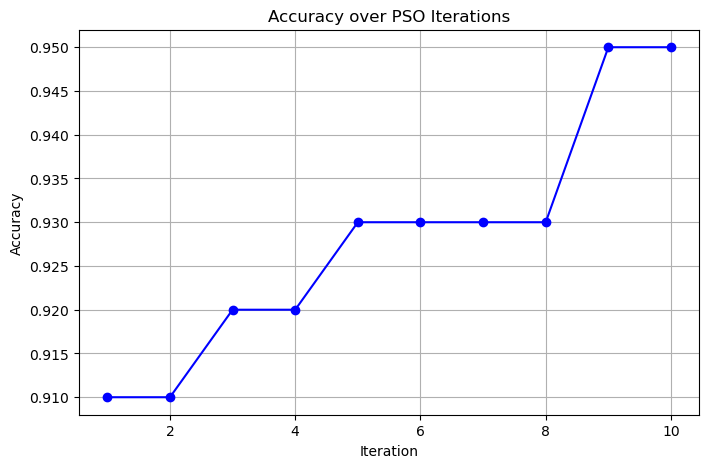

In [ ]:
import numpy as np
import pyswarms as ps
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a dataset (Replace this with your actual dataset)
X, y = make_classification(n_samples=500, n_features=20, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define fitness function
def fitness_function(positions):
    scores = []
    for position in positions:
        mask = position > 0.5  # Convert binary PSO positions to feature selection mask
        if np.sum(mask) == 0:  # Avoid division by zero
            scores.append(1)
            continue
        X_train_selected = X_train[:, mask]
        X_test_selected = X_test[:, mask]

        # Try different k values and choose the best one
        best_k = 1
        best_accuracy = 0
        for k in range(1, 11):  # Check k from 1 to 10
            model = KNeighborsClassifier(n_neighbors=k)
            model.fit(X_train_selected, y_train)
            y_pred = model.predict(X_test_selected)
            acc = accuracy_score(y_test, y_pred)
            if acc > best_accuracy:
                best_accuracy = acc
                best_k = k
        
        scores.append(1 - best_accuracy)  # Minimize error
    return np.array(scores)

# Optimize feature selection using Binary PSO
options = {'c1': 2, 'c2': 2, 'w': 0.9, 'k': 5, 'p': 2}
optimizer = ps.discrete.BinaryPSO(n_particles=10, dimensions=X.shape[1], options=options)

start_time = time.time()
best_cost, best_position = optimizer.optimize(fitness_function, iters=10)
end_time = time.time()

# Train KNN with selected features
selected_features = best_position > 0.5
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Find best k again
best_k = 1
best_accuracy = 0
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_selected, y_train)
    y_pred = knn.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

# Final training with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy with Selected Features: {accuracy:.4f}")
print(f"Best k value: {best_k}")
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Fix cost history for plotting
cost_history = optimizer.cost_history  # Get cost history properly
cost_history = np.array(cost_history).flatten()  # Ensure it's a flat array

# Plot accuracy over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cost_history) + 1), 1 - cost_history, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy over PSO Iterations')
plt.grid()
plt.show()


2025-03-25 21:16:09,340 - pyswarms.discrete.binary - INFO - Optimize for 10 iters with {'c1': 2, 'c2': 2, 'w': 0.9, 'k': 5, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|10/10, best_cost=0.07
2025-03-25 21:16:41,471 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.06999999999999995, best pos: [1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1]


SVM Accuracy with Selected Features: 0.9300
Best C value: 10
Time taken: 32.13 seconds


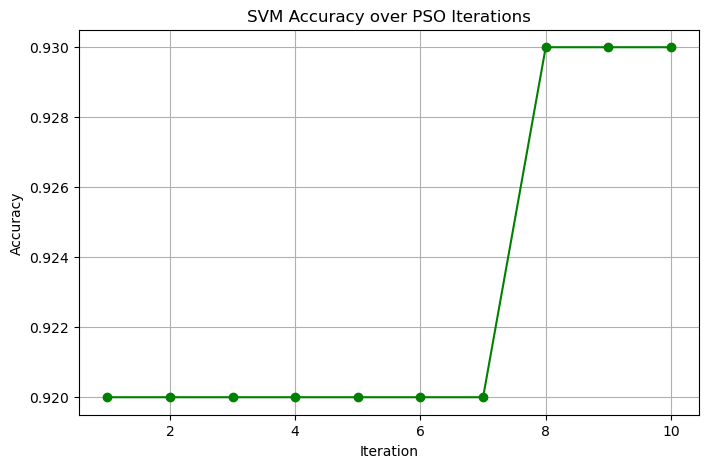

In [64]:
import numpy as np
import pyswarms as ps
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a dataset (Replace this with your actual dataset)
X, y = make_classification(n_samples=500, n_features=20, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define fitness function for SVM
def fitness_function(positions):
    scores = []
    for position in positions:
        mask = position > 0.5  
        if np.sum(mask) == 0:  
            scores.append(1)
            continue
        X_train_selected = X_train[:, mask]
        X_test_selected = X_test[:, mask]

        # Hyperparameter tuning for best C value
        best_C = 1
        best_accuracy = 0
        for C in [0.1, 1, 10, 100]:  
            model = SVC(C=C, kernel='linear')
            model.fit(X_train_selected, y_train)
            y_pred = model.predict(X_test_selected)
            acc = accuracy_score(y_test, y_pred)
            if acc > best_accuracy:
                best_accuracy = acc
                best_C = C
        
        scores.append(1 - best_accuracy)  
    return np.array(scores)

# Optimize feature selection using Binary PSO
options = {'c1': 2, 'c2': 2, 'w': 0.9, 'k': 5, 'p': 2}
optimizer = ps.discrete.BinaryPSO(n_particles=10, dimensions=X.shape[1], options=options)

start_time = time.time()
best_cost, best_position = optimizer.optimize(fitness_function, iters=10)
end_time = time.time()

# Train SVM with selected features
selected_features = best_position > 0.5
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Find best C again
best_C = 1
best_accuracy = 0
for C in [0.1, 1, 10, 100]:
    svm = SVC(C=C, kernel='linear')
    svm.fit(X_train_selected, y_train)
    y_pred = svm.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_C = C

# Final training with best C
svm = SVC(C=best_C, kernel='linear')
svm.fit(X_train_selected, y_train)
y_pred = svm.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy with Selected Features: {accuracy:.4f}")
print(f"Best C value: {best_C}")
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Fix cost history for plotting
cost_history = np.array(optimizer.cost_history).flatten()

# Plot accuracy over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cost_history) + 1), 1 - cost_history, marker='o', linestyle='-', color='g')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy over PSO Iterations')
plt.grid()
plt.show()


2025-03-25 21:16:54,597 - pyswarms.discrete.binary - INFO - Optimize for 10 iters with {'c1': 2, 'c2': 2, 'w': 0.9, 'k': 5, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|10/10, best_cost=0.04
2025-03-25 21:19:40,064 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.040000000000000036, best pos: [1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0]


Random Forest Accuracy with Selected Features: 0.9600
Best n_estimators: 50
Time taken: 165.47 seconds


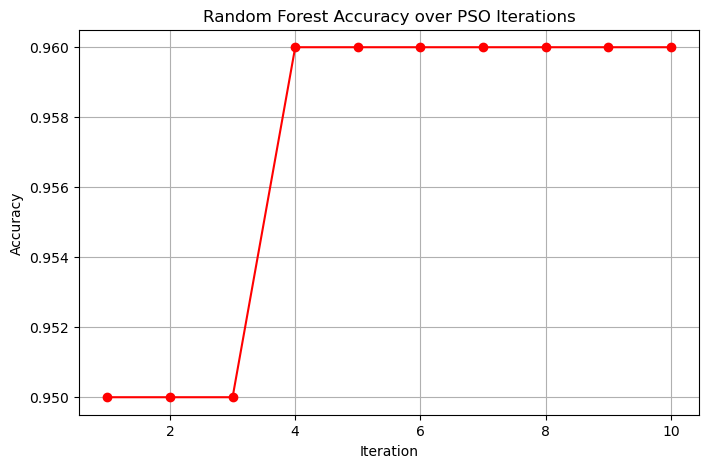

In [66]:
import numpy as np
import pyswarms as ps
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a dataset (Replace this with your actual dataset)
X, y = make_classification(n_samples=500, n_features=20, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define fitness function for Random Forest
def fitness_function(positions):
    scores = []
    for position in positions:
        mask = position > 0.5  
        if np.sum(mask) == 0:  
            scores.append(1)
            continue
        X_train_selected = X_train[:, mask]
        X_test_selected = X_test[:, mask]

        # Hyperparameter tuning for best n_estimators
        best_n = 10
        best_accuracy = 0
        for n in [10, 50, 100, 200]:  
            model = RandomForestClassifier(n_estimators=n, random_state=42)
            model.fit(X_train_selected, y_train)
            y_pred = model.predict(X_test_selected)
            acc = accuracy_score(y_test, y_pred)
            if acc > best_accuracy:
                best_accuracy = acc
                best_n = n
        
        scores.append(1 - best_accuracy)  
    return np.array(scores)

# Optimize feature selection using Binary PSO
options = {'c1': 2, 'c2': 2, 'w': 0.9, 'k': 5, 'p': 2}
optimizer = ps.discrete.BinaryPSO(n_particles=10, dimensions=X.shape[1], options=options)

start_time = time.time()
best_cost, best_position = optimizer.optimize(fitness_function, iters=10)
end_time = time.time()

# Train Random Forest with selected features
selected_features = best_position > 0.5
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Find best n_estimators again
best_n = 10
best_accuracy = 0
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_selected, y_train)
    y_pred = rf.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_n = n

# Final training with best n_estimators
rf = RandomForestClassifier(n_estimators=best_n, random_state=42)
rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy with Selected Features: {accuracy:.4f}")
print(f"Best n_estimators: {best_n}")
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Fix cost history for plotting
cost_history = np.array(optimizer.cost_history).flatten()

# Plot accuracy over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cost_history) + 1), 1 - cost_history, marker='o', linestyle='-', color='r')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy over PSO Iterations')
plt.grid()
plt.show()


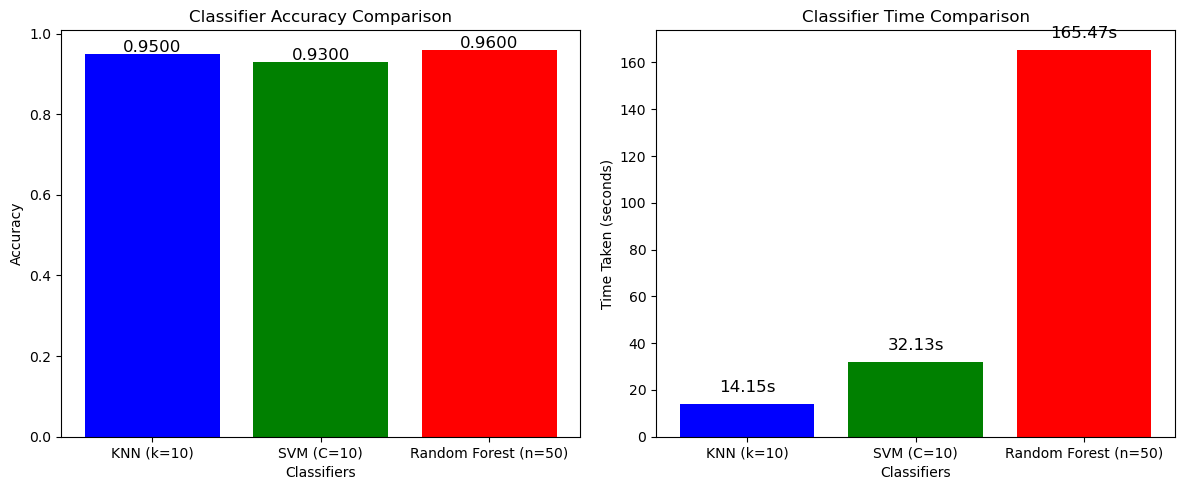


🔹 Accuracy Scores:
KNN (k=10): 0.9500
SVM (C=10): 0.9300
Random Forest (n=50): 0.9600

🔹 Time Taken (seconds):
KNN (k=10): 14.15s
SVM (C=10): 32.13s
Random Forest (n=50): 165.47s

✅ Best Classifier: Random Forest (n=50)
🔹 Reason: It has the highest accuracy, which is prioritized.


In [70]:
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Classifier names
classifiers = ['KNN (k=10)', 'SVM (C=10)', 'Random Forest (n=50)']

# 🔹 Accuracy and Time Taken (Updated with your values)
accuracies = [0.9500, 0.9300, 0.9600]  # Accuracy of KNN, SVM, Random Forest
times = [14.15, 32.13, 165.47]  # Time taken in seconds

# 🔹 Determine the Best Classifier
best_acc_index = np.argmax(accuracies)  # Highest accuracy index
best_time_index = np.argmin(times)  # Least time taken index

# 🔹 Choosing the best classifier based on accuracy and time
if best_acc_index == best_time_index:
    best_classifier = classifiers[best_acc_index]
    reason = "It has the highest accuracy and the lowest time taken."
else:
    if accuracies[best_acc_index] - accuracies[best_time_index] > 0.01:  # Accuracy difference > 1%
        best_classifier = classifiers[best_acc_index]
        reason = "It has the highest accuracy, which is prioritized."
    else:
        best_classifier = classifiers[best_time_index]
        reason = "The accuracy difference is small, so the faster model is chosen."

# 🔹 Plot Accuracy Comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=12)

# 🔹 Plot Time Taken Comparison
plt.subplot(1, 2, 2)
plt.bar(classifiers, times, color=['blue', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Time Taken (seconds)')
plt.title('Classifier Time Comparison')
for i, v in enumerate(times):
    plt.text(i, v + 5, f"{v:.2f}s", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# 🔹 Print Results
print("\n🔹 Accuracy Scores:")
for i in range(len(classifiers)):
    print(f"{classifiers[i]}: {accuracies[i]:.4f}")

print("\n🔹 Time Taken (seconds):")
for i in range(len(classifiers)):
    print(f"{classifiers[i]}: {times[i]:.2f}s")

print(f"\n✅ Best Classifier: {best_classifier}")
print(f"🔹 Reason: {reason}")
